# Usage

In [1]:
# append scripts path and import Model
import sys
sys.path.append('../scripts')

from model import Model

# create model object 
model = Model()

### 1) Preprocess data 
    Preprocesses and saves files to data/. 
    For this process to work train.csv, test.csv and structures.csv have to be in data/ 
    This process takes some time (~30 min).

In [2]:
model.preprocess_data()

Preprocessing train data from csv files ... Done!
Preprocessing test data from csv files ... Done!


### 2) Load data
    Loads preprocessed data from data/

In [3]:
model.load_data()

### 3) Set the network and start training!
    Saves to network/timestamp/
    - hyper.txt contains hyper parameters
    - loss.csv keeps track of the loss
    - save_history.csv gets new entries on each save
      with iteration, mean loss, std loss, time elapsed
    If saving is not desired save_every can be set to None

In [4]:
# set_network sets and randomly initializes the network
model.set_network(pair_blocks=1, base_channels=512, layers=5)
model.train(iterations=1000, optimizer='Adam', learning_rate=1e-4,
            save_name='test', save_every=100, print_every=100)

timestamp: 2019-09-30_09-32-46_test

iteration 100, loss: 1.40e+00 ± 1.31e+00, time: 4.1s
iteration 200, loss: 1.21e+00 ± 1.12e+00, time: 2.9s
iteration 300, loss: 9.71e-01 ± 6.98e-01, time: 3.0s
iteration 400, loss: 1.06e+00 ± 9.90e-01, time: 2.7s
iteration 500, loss: 1.01e+00 ± 7.52e-01, time: 2.8s
iteration 600, loss: 7.95e-01 ± 5.09e-01, time: 3.0s
iteration 700, loss: 7.95e-01 ± 4.72e-01, time: 2.8s
iteration 800, loss: 9.53e-01 ± 9.41e-01, time: 2.9s
iteration 900, loss: 7.86e-01 ± 6.27e-01, time: 3.1s
iteration 1000, loss: 7.36e-01 ± 5.07e-01, time: 3.0s

total time: 30.4s


In [5]:
# resume training, a new entry in hyper.txt is made with the new hyper parameters
model.train(iterations=1000, optimizer='Adam', learning_rate=1e-4,
            save_name='test', save_every=100, print_every=100)

iteration 1100, loss: 7.89e-01 ± 4.86e-01, time: 2.7s
iteration 1200, loss: 6.25e-01 ± 3.95e-01, time: 2.8s
iteration 1300, loss: 7.17e-01 ± 5.57e-01, time: 2.9s
iteration 1400, loss: 7.24e-01 ± 8.54e-01, time: 3.0s
iteration 1500, loss: 6.44e-01 ± 4.27e-01, time: 2.7s
iteration 1600, loss: 6.04e-01 ± 4.38e-01, time: 2.8s
iteration 1700, loss: 5.58e-01 ± 4.33e-01, time: 3.0s
iteration 1800, loss: 4.81e-01 ± 2.30e-01, time: 2.9s
iteration 1900, loss: 6.23e-01 ± 4.69e-01, time: 2.7s
iteration 2000, loss: 5.90e-01 ± 4.11e-01, time: 2.9s

total time: 28.4s


In [7]:
# to load a model first set the network if it is not already set
# and then load with a time stamp
model.set_network(pair_blocks=1, base_channels=512, layers=5)
model.load('2019-09-30_09-32-46_test')

In [8]:
# resume training
model.train(iterations=1000, optimizer='Adam', learning_rate=5e-5,
            save_name='test', save_every=100, print_every=100)

iteration 2100, loss: 4.83e-01 ± 3.88e-01, time: 2.8s
iteration 2200, loss: 4.03e-01 ± 4.19e-01, time: 2.9s
iteration 2300, loss: 4.01e-01 ± 3.96e-01, time: 2.9s
iteration 2400, loss: 4.14e-01 ± 2.82e-01, time: 2.9s
iteration 2500, loss: 3.70e-01 ± 2.67e-01, time: 3.0s
iteration 2600, loss: 3.18e-01 ± 1.76e-01, time: 2.9s
iteration 2700, loss: 5.16e-01 ± 1.11e+00, time: 2.7s
iteration 2800, loss: 3.95e-01 ± 2.61e-01, time: 2.9s
iteration 2900, loss: 4.32e-01 ± 5.32e-01, time: 2.8s
iteration 3000, loss: 3.59e-01 ± 2.62e-01, time: 2.9s

total time: 28.7s


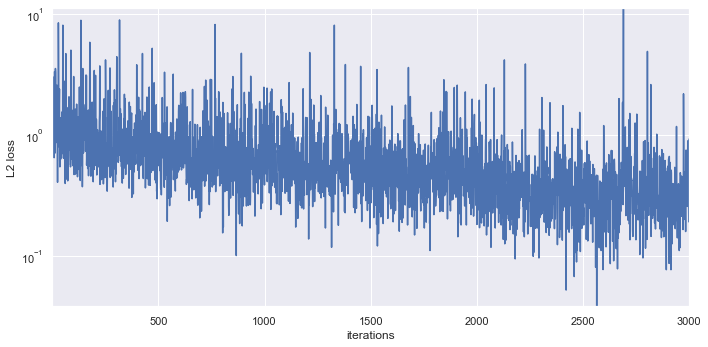

In [9]:
# create a plot; with just 3000 iterations, the network didn't learn much yet
model.plot(scale='log', figsize=(10,5), save_name='plot.pdf')

### 4) Creation of the submission file

In [10]:
# the network creates predictions from the smallest (2) to the largest molecules (131) in
# batches with molecules of the same size
model.test(max_batch_size=16)

Creating predictions for submission ...
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 
total time: 4.4m
